Oil is fueling the whole world, it controls the global economy, every commodity price has a dependency on oil as commodities needs to be transported, and most of the place means of transportation depends on oil, that’s why every country try to keep their oil production as a secret for various reasons. Oil is stocked up in the storage tanks, the information for oil production and consumption is not transparent. Various country which are the most oil producing nations always try to fix the oil prices as per their needs, at the present time the cost of barrel of oil is at the highest, because of oil various countries are always in conflicting and in war kind of situation. Oil is just not fueling various nation but creates various tensions between nation, they never want to share the complete data about this resource. That’s why various companies like Planet and Orbital Insight have started collecting satellite images of the oil storage tanks and estimation of them.
Floating head tanks help in estimating the volume of the oil tanks, oil when directly comes in contact of air it starts fuming to avoid that a head sits on the top of the storage tanks. By calculating the relative inner shadow and exterior shadow we can calculate the volume of the tank. 
In some of the research paper volume is estimated by calculating the volume of the cylinder, by calculating the height of the storage tanks using shadow and radius of the storage tanks with the help of Hough Transform, but some of the later paper , the volume is calucated by caluclating the interior shadow length and exterior shadow length.
Oil is fueling the whole world, it controls the global economy, every commodity price has a dependency on oil as commodities needs to be transported, and most of the place means of transportation depends on oil, that’s why every country try to keep their oil production as a secret for various reasons. Oil is stocked up in the storage tanks, the information for oil production and consumption is not transparent. Various country which are the most oil producing nations always try to fix the oil prices as per their needs, at the present time the cost of barrel of oil is at the highest, because of oil various countries are always in conflicting and in war kind of situation. Oil is just not fueling various nation but creates various tensions between nation, they never want to share the complete data about this resource. That’s why various companies like Planet and Orbital Insight have started collecting satellite images of the oil storage tanks and estimation of them.
Floating head tanks help in estimating the volume of the oil tanks, oil when directly comes in contact of air it starts fuming to avoid that a head sits on the top of the storage tanks. By calculating the relative inner shadow and exterior shadow we can calculate the volume of the tank. 
In some of the research paper volume is estimated by calculating the volume of the cylinder, by calculating the height of the storage tanks using shadow and radius of the storage tanks with the help of Hough Transform, but some of the later paper , the volume is calucated by caluclating the interior shadow length and exterior shadow length.
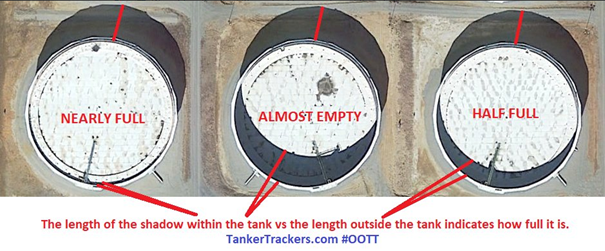




Data is available at https://www.kaggle.com/towardsentropy/oil-storage-tanks?

Two folders : 
     Large_images : This folder consist of 100 images of the storage tanks  each with a resolution of 4800X4800 and stored in jpg format
      Image_patches : This folder consists of 10000 images dimensions 512X512 for each images ,all images are stored in jpg format.Each large images is divided into 100 images row and column and is stored in the format of id_row_column.jpg

Three files
labels.json: This file contain the labels of the images, Four Kinds of labellings’s are done skip for nothing , Float Tank , Tank and Tank Clusters , except for every other labels there are data in the format of [x,y]
labels_coco.json: COCO label format is present . Here bounding boxes are formatted as [x_min, y_min, width, height]. 
large_image_data.csv: It contains  coordinates of the center of each image and the altitude.
Metrics to be used is mean average precision


**Downloading data**

In [1]:
!gdown --id 1JA5YtBcL2462ekmyHxZcyj6Y6m3aiKt1

Downloading...
From: https://drive.google.com/uc?id=1JA5YtBcL2462ekmyHxZcyj6Y6m3aiKt1
To: /content/Oil Tanks.zip
100% 1.81G/1.81G [00:29<00:00, 60.8MB/s]


In [ ]:
!unzip  'Oil Tanks.zip'


In [6]:
%cd 'Oil Tanks'

/content/Oil Tanks


In [23]:
%cd /content/

/content


In [3]:
!mv 'Oil Tanks' 'oil'

**Importing Libraries**

In [4]:
import json
import os
import warnings
import seaborn as sns
import matplotlib as plt
warnings.filterwarnings('ignore')

**Analysing labels.json**

In [5]:
# taken from previous assginments segmentation
json_path = '/content/oil/labels.json'
f = open(json_path,'r')
# as load takes read iteratively
labels = json.load(f)
print ("Total number of labels",len(labels))
f.close()

Total number of labels 10000


**Display some of the labels**

In [6]:
labels[5:10]

[{'file_name': '01_0_5.jpg', 'id': 5, 'label': 'Skip'},
 {'file_name': '01_0_6.jpg', 'id': 6, 'label': 'Skip'},
 {'file_name': '01_0_7.jpg', 'id': 7, 'label': 'Skip'},
 {'file_name': '01_0_8.jpg', 'id': 8, 'label': 'Skip'},
 {'file_name': '01_0_9.jpg', 'id': 9, 'label': 'Skip'}]

**Counting all the labels**

In [ ]:
#empty dictionary to store the dictinoary
dict1 = dict()
fht_per_image = [] # full tank head per image
#iterate over complete labels
for i in  range(len(labels)):
  # storing each label value
  # as the labels is list of dictionaries
  label_value = labels[i]['label']
  # there are many label_value which is empty
  if len(label_value) !=0:
    # if the label_value is of type dictionary
    if isinstance(label_value,dict)==True:
      dummy = list(label_value.keys())
      print ("dummy=",dummy)
      # iterate over all the keys of the dictionary
      count = 0
      for j in dummy:
        if j=='Floating Head Tank':
          count = len(labels[i]['label']['Floating Head Tank'])
          print (count)
          fht_per_image.append(count)  
        # check if the dictionary keys exist or not and increment
        dict1[j] = dict1.get(j,0)+1
      
    else:
      # check if the 
      dict1[label_value] = dict1.get(label_value,0)+1
       
  else:
    # update the none no of keys
   dict1['None'] = dict1.get('None',0)+1
    

In [ ]:
print (max(fht_per_image))
freq_count = dict()
for i in fht_per_image:
  freq_count[i] = freq_count.get(i,0)+1

In [ ]:
freq_count

Text(0.5, 1.0, 'labels histogram')

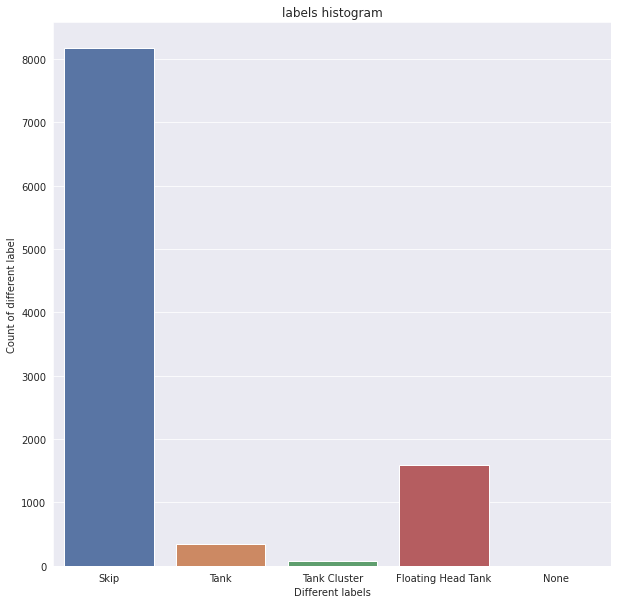

In [10]:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
sns.set({'figure.figsize':(10,10)})
sb = sns.barplot(x=list(dict1.keys()),y=list(dict1.values()))
# setting the x label
sb.set_xlabel("Different labels")
# setting the y label
sb.set_ylabel("Count of different label")
# setting the title
sb.set_title("labels histogram")

*  Out of 10000 labels around 8.1k labels are skip
*  1 label is empty
*  Floating head Tank around 1.6k



**Distrubution of Floating head Tank per image**

Text(0.5, 1.0, 'Distrubution of Floating head Tank')

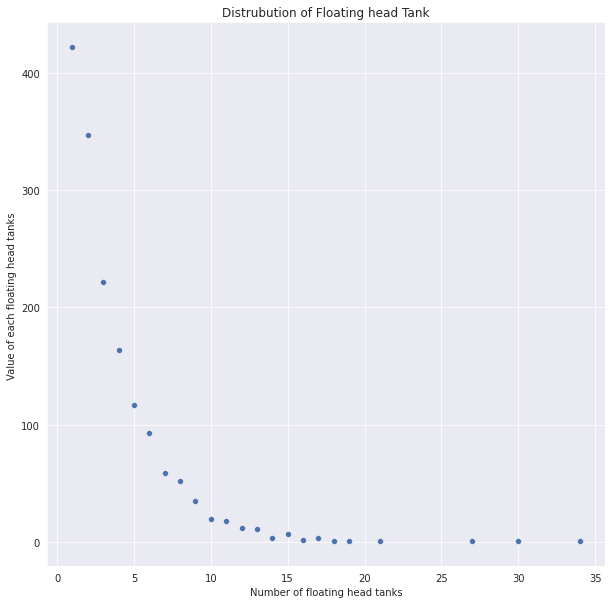

In [11]:
# https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
# floating head tank in every image 
# there are images in which there are multiple floating head tank
sns.set({'figure.figsize':(10,10)})
sb = sns.scatterplot(x=list(freq_count.keys()),y=list(freq_count.values()))
# setting the xlabel
sb.set_xlabel("Number of floating head tanks")
# setting the ylabel
sb.set_ylabel("Value of each floating head tanks ")
# setting the title 
sb.set_title("Distrubution of Floating head Tank")



*   Maximum number of floating head tank in a image is 34.
*   Most of the images have only one Floating Head Tank.



**Analysing cocoa json**

In [ ]:
# taken from previous assginments segmentation
json_path = '/content/oil/labels_coco.json'
f = open(json_path,'r')
# as load takes read iteratively
labels = json.load(f)
print ("Total number of labels",len(labels))
f.close()

In [13]:
print  (labels.keys())

dict_keys(['categories', 'annotations', 'images'])


In [14]:
print (labels['categories'])

[{'id': 1, 'name': 'Floating Head Tank'}]


In [15]:
print (labels['images'])

[{'id': 0, 'file_name': '01_0_0.jpg'}, {'id': 1, 'file_name': '01_0_1.jpg'}, {'id': 2, 'file_name': '01_0_2.jpg'}, {'id': 3, 'file_name': '01_0_3.jpg'}, {'id': 4, 'file_name': '01_0_4.jpg'}, {'id': 5, 'file_name': '01_0_5.jpg'}, {'id': 6, 'file_name': '01_0_6.jpg'}, {'id': 7, 'file_name': '01_0_7.jpg'}, {'id': 8, 'file_name': '01_0_8.jpg'}, {'id': 9, 'file_name': '01_0_9.jpg'}, {'id': 10, 'file_name': '01_1_0.jpg'}, {'id': 11, 'file_name': '01_1_1.jpg'}, {'id': 12, 'file_name': '01_1_2.jpg'}, {'id': 13, 'file_name': '01_1_3.jpg'}, {'id': 14, 'file_name': '01_1_4.jpg'}, {'id': 15, 'file_name': '01_1_5.jpg'}, {'id': 16, 'file_name': '01_1_6.jpg'}, {'id': 17, 'file_name': '01_1_7.jpg'}, {'id': 18, 'file_name': '01_1_8.jpg'}, {'id': 19, 'file_name': '01_1_9.jpg'}, {'id': 20, 'file_name': '01_2_0.jpg'}, {'id': 21, 'file_name': '01_2_1.jpg'}, {'id': 22, 'file_name': '01_2_2.jpg'}, {'id': 23, 'file_name': '01_2_3.jpg'}, {'id': 24, 'file_name': '01_2_4.jpg'}, {'id': 25, 'file_name': '01_2_5.jp

In [16]:
print (labels['annotations'])

[{'image_id': 28, 'category_id': 1, 'bbox': [275, 414, 59, 57]}, {'image_id': 30, 'category_id': 1, 'bbox': [416, 147, 21, 19]}, {'image_id': 39, 'category_id': 1, 'bbox': [224, 260, 91, 89]}, {'image_id': 39, 'category_id': 1, 'bbox': [313, 432, 55, 57]}, {'image_id': 39, 'category_id': 1, 'bbox': [444, 434, 52, 53]}, {'image_id': 39, 'category_id': 1, 'bbox': [201, 478, 90, 34]}, {'image_id': 42, 'category_id': 1, 'bbox': [15, 491, 57, 20]}, {'image_id': 43, 'category_id': 1, 'bbox': [364, 365, 58, 53]}, {'image_id': 43, 'category_id': 1, 'bbox': [365, 492, 58, 20]}, {'image_id': 43, 'category_id': 1, 'bbox': [493, 494, 19, 17]}, {'image_id': 44, 'category_id': 1, 'bbox': [176, 56, 46, 43]}, {'image_id': 44, 'category_id': 1, 'bbox': [257, 58, 46, 42]}, {'image_id': 44, 'category_id': 1, 'bbox': [179, 143, 44, 38]}, {'image_id': 44, 'category_id': 1, 'bbox': [258, 142, 45, 43]}, {'image_id': 44, 'category_id': 1, 'bbox': [163, 359, 71, 65]}, {'image_id': 44, 'category_id': 1, 'bbox':

Coco dataset has categories and data only for floating head tank

**Analyzing large_image_data**

In [17]:
import pandas as pd
df = pd.read_csv('/content/oil/large_image_data.csv')

In [19]:
df

Filename  Eye Alt (m)  ...      Longitude                  General Location
0    01_large.jpg         3000  ...  94°55'46.18"W  Texas City, Texas, United States
1    02_large.jpg         3000  ...  94°53'59.82"W  Texas City, Texas, United States
2    03_large.jpg         3000  ...  95°19'34.26"W  Brazosport, Texas, United States
3    04_large.jpg         3000  ...  95°23'50.35"W       Clute, Texas, United States
4    05_large.jpg         3000  ...  95°14'54.80"W     Houston, Texas, United States
..            ...          ...  ...            ...                               ...
95   96_large.jpg         3000  ...  80°16'45.91"E               Elandancheri, India
96   97_large.jpg         3000  ...  51°34'15.55"E                Ad-Daẖirah, Qatar
97   98_large.jpg         3000  ...  50°37'32.24"E                    Sitra, Bahrain
98   99_large.jpg         3000  ...  49°28'24.98"E    Sangachal Terminal, Azerbaijan
99  100_large.jpg         3000  ...  45°56'39.94"E           Zavodskoy Rayon, Russia

[100 rows x 5 columns]

This data is of no use to us.

**Plotting satellite images**

In [20]:
import cv2

In [23]:
json_path = '/content/oil/labels.json'
f = open(json_path,'r')
# as load takes read iteratively
labels = json.load(f)
print ("Total number of labels",len(labels))
f.close()

Total number of labels 10000


In [105]:
from google.colab.patches import cv2_imshow
class Plot_Image:
  def __init__(self,image_path,labels_list,complete_path):
    '''
    Constructor to initalize the variable in the class
    needed to plit the image
    This class takes the image name and image complete
    path and plot the image using opencv
    '''
    # image path is provided as relative path
    self.image_name = image_path
    # complete path of the image
    self.complete_path = complete_path
    # label list
    self.labels_list = labels_list
    # label values
    self.labels = ''
    # x-min value
    self.x_min = 0
    # y-min value
    self.y_min = 0
    # x-max value
    self.x_max = 0
    # y-max value
    self.y_max = 0
    # image-id of the image
    self.image_id = 0
    # image extension format
    self.extension = '.jpg'
  
  def compute_max_min_coordinates(self,geometry):
    '''
    This function takes the list of dictionaries
    Example: "geometry": [{"x": 103, "y": 310}, {"x": 103, "y": 334}, 
    {"x": 133, "y": 334}, {"x": 133, "y": 310}]}
    kind of object from which we fetch x and y coordinates and store the x_min,
    x_max,y_min and y_max as needed by opencv
    '''
    # variable to store x and y values
    x_val = []
    y_val = []
    # iterate every list of dictionaries
    for i in geometry:
      # storing the values of the x and y coordinates
      x_val.append(i['x'])
      y_val.append(i['y'])
    # sort the x and y values
    x_val.sort()
    y_val.sort()
    # store the min and max values
    self.x_min = x_val[0]
    self.x_max = x_val[-1]
    self.y_min = y_val[0]
    self.y_max = y_val[-1]


  def get_image_id(self):
    '''
    We deduce the image id so that we can look into json file for the other 
    parameters
    '''
    final = self.image_name.rsplit(self.extension)[0]
    # there are 10000 images with 100 large image 
    # and each image name are numbered as rows and cols
    # each having rows upto 10 and cols upto 10
    image_number,row,col= final.split('_')
    # as numbering starts from 1 for image number
    self.image_id = 100*(int(image_number)-1)+10*int(row) + int(col)

  def  iterate(self):
    '''
    In this method we iterate over all the labels which are dictionary type
    and then iterate through all the labels and find the exact geometries of
    the label and then call plot_image function using their image_id
    '''
    # checking for label is not skip and label is not empty
    self.get_image_id()
    # getting label value
    label_val = self.labels_list[self.image_id]['label']
    # checking length of label_val is non empty
    if len(label_val) !=0:
      # checking if the type is dictionary
      if isinstance(label_val,dict) == True:
          # get all the keys of the label
          for _val in list(label_val.keys()):
            # there can be multiple geometry in a label_value as labe will be 
            # having again values as list so there can be multiple geometry kind 
            # of keys in the value of labels
            print (_val)
            print (self.labels_list[self.image_id]['label'])
            for geometry in  self.labels_list[self.image_id]['label'][_val]:
              # store all the keys in the label
              self.compute_max_min_coordinates(geometry['geometry'])
              # assigning label
              self.labels = _val
              # plotting image
              self.plot_image()
              
  def plot_image(self):
    # https://stackoverflow.com/questions/54054865/given-pixel-label-draw-a-bounding-box-in-python/54070043
    image = cv2.imread(self.complete_path)
    cv2.rectangle(image,(self.x_min,self.y_min),(self.x_max,self.y_max),(0,255,0),2)
    # https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text#:~:text=You%20can%20use%20cv2.,it%20by%20shifting%20it%20upwards.
    cv2.putText(image, str(self.labels), (self.x_min, self.y_min-1),cv2.FONT_HERSHEY_SIMPLEX,0.8, (255,0,0), 2,cv2.LINE_AA)
    #as cv2_imshow crashes in google colab
    cv2_imshow(image)



282
Tank
{'Tank': [{'geometry': [{'x': 30, 'y': 52}, {'x': 30, 'y': 123}, {'x': 109, 'y': 123}, {'x': 109, 'y': 52}]}, {'geometry': [{'x': 1, 'y': 138}, {'x': 1, 'y': 210}, {'x': 43, 'y': 210}, {'x': 44, 'y': 138}]}, {'geometry': [{'x': 110, 'y': 263}, {'x': 110, 'y': 337}, {'x': 187, 'y': 337}, {'x': 187, 'y': 263}]}, {'geometry': [{'x': 258, 'y': 180}, {'x': 258, 'y': 254}, {'x': 333, 'y': 254}, {'x': 333, 'y': 180}]}, {'geometry': [{'x': 373, 'y': 323}, {'x': 373, 'y': 374}, {'x': 425, 'y': 374}, {'x': 425, 'y': 323}]}, {'geometry': [{'x': 444, 'y': 442}, {'x': 375, 'y': 442}, {'x': 375, 'y': 380}, {'x': 444, 'y': 380}]}, {'geometry': [{'x': 174, 'y': 450}, {'x': 174, 'y': 495}, {'x': 225, 'y': 495}, {'x': 225, 'y': 450}]}], 'Floating Head Tank': [{'geometry': [{'x': 458, 'y': 328}, {'x': 458, 'y': 374}, {'x': 507, 'y': 374}, {'x': 507, 'y': 328}]}, {'geometry': [{'x': 229, 'y': 465}, {'x': 229, 'y': 511}, {'x': 293, 'y': 511}, {'x': 293, 'y': 465}]}, {'geometry': [{'x': 462, 'y': 1

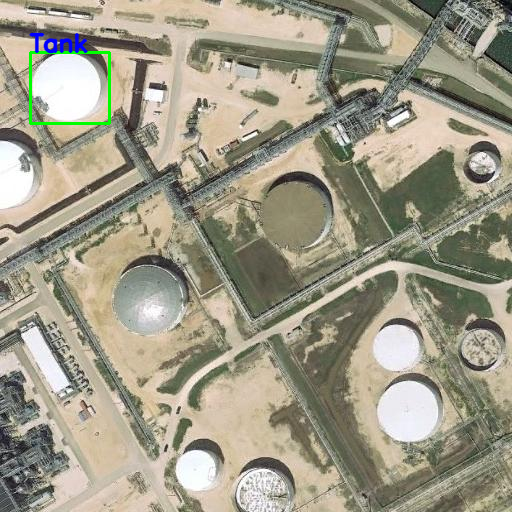

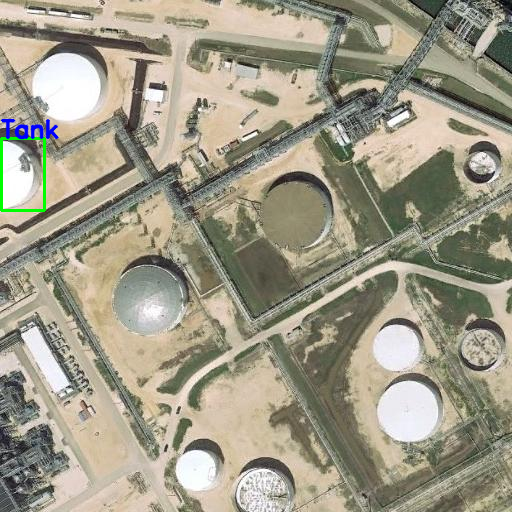

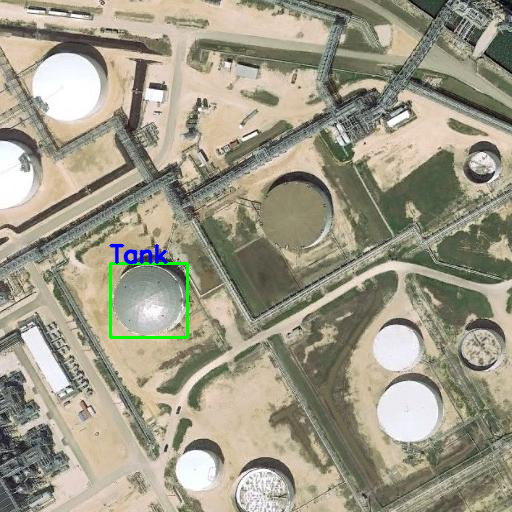

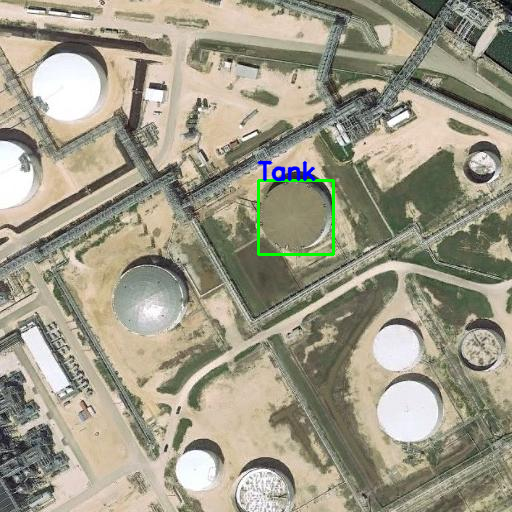

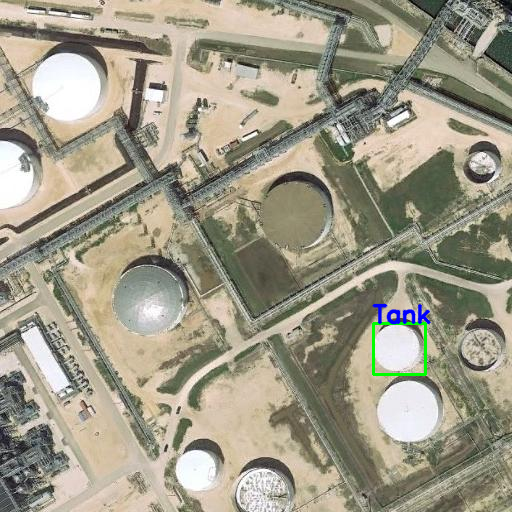

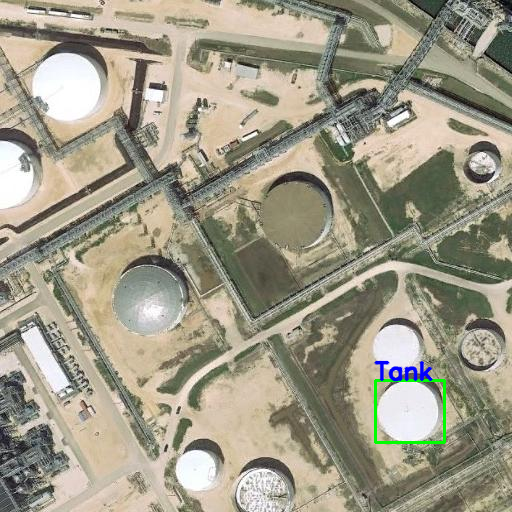

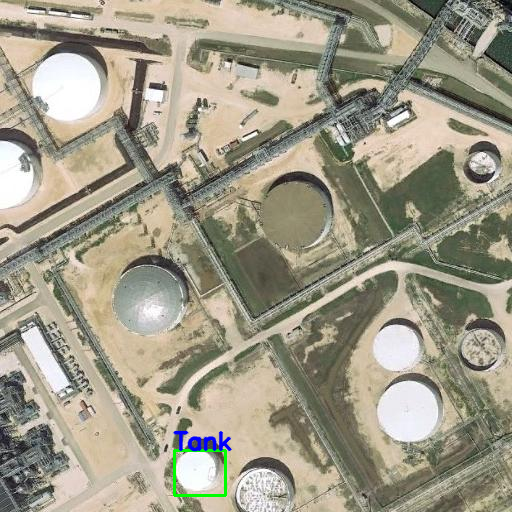

Floating Head Tank
{'Tank': [{'geometry': [{'x': 30, 'y': 52}, {'x': 30, 'y': 123}, {'x': 109, 'y': 123}, {'x': 109, 'y': 52}]}, {'geometry': [{'x': 1, 'y': 138}, {'x': 1, 'y': 210}, {'x': 43, 'y': 210}, {'x': 44, 'y': 138}]}, {'geometry': [{'x': 110, 'y': 263}, {'x': 110, 'y': 337}, {'x': 187, 'y': 337}, {'x': 187, 'y': 263}]}, {'geometry': [{'x': 258, 'y': 180}, {'x': 258, 'y': 254}, {'x': 333, 'y': 254}, {'x': 333, 'y': 180}]}, {'geometry': [{'x': 373, 'y': 323}, {'x': 373, 'y': 374}, {'x': 425, 'y': 374}, {'x': 425, 'y': 323}]}, {'geometry': [{'x': 444, 'y': 442}, {'x': 375, 'y': 442}, {'x': 375, 'y': 380}, {'x': 444, 'y': 380}]}, {'geometry': [{'x': 174, 'y': 450}, {'x': 174, 'y': 495}, {'x': 225, 'y': 495}, {'x': 225, 'y': 450}]}], 'Floating Head Tank': [{'geometry': [{'x': 458, 'y': 328}, {'x': 458, 'y': 374}, {'x': 507, 'y': 374}, {'x': 507, 'y': 328}]}, {'geometry': [{'x': 229, 'y': 465}, {'x': 229, 'y': 511}, {'x': 293, 'y': 511}, {'x': 293, 'y': 465}]}, {'geometry': [{'x': 4

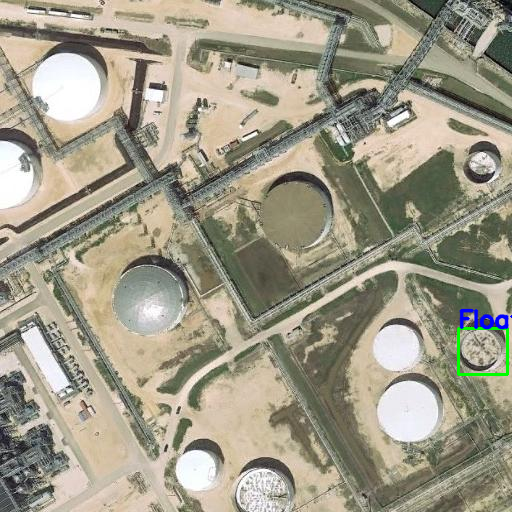

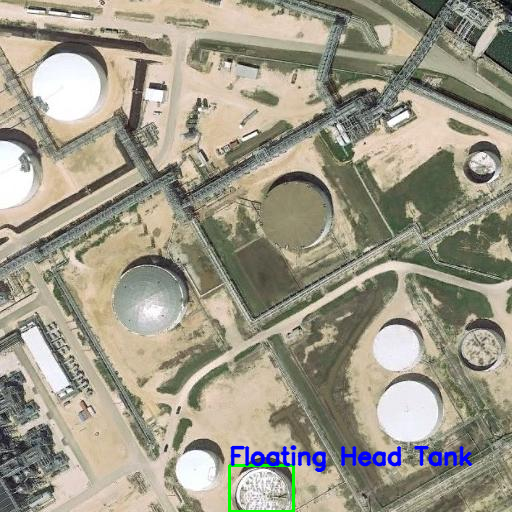

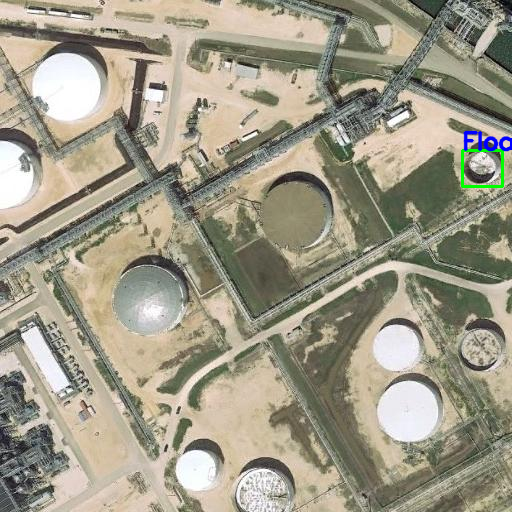

In [106]:
obj = Plot_Image('03_8_2.jpg',labels,'/content/oil/image_patches/03_8_2.jpg')
obj.iterate()